In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from keras import backend as keras
from tensorflow import keras

import numpy as np

In [3]:
import os
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb01" in x or "chb02" in x or "chb03" in x or "chb04" in x or "chb05" in x or "chb06" in x or "chb07" in x or "chb08" in x]
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb02" in x or "chb03" in x or "chb04" in x or "chb05" in x or "chb07" in x or "chb08" in x or "chb09" in x]
cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if not "chb01" in x and "chb" in x]
# test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if not "chb06" in x and "chb" in x]

In [4]:
# from data import generate_balanced_pre_ictal_train_data
# generate_balanced_pre_ictal_train_data(256, 256, [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb" in x], 40)

In [5]:
from seizure_sequence import SeizureSequence
test_cases = [x for x in os.listdir("dataset/chb-mit-scalp-eeg-database-1.0.0/") if "chb02" in x or "chb03" in x or "chb04" in x or "chb05" in x or "chb07" in x or "chb08" in x or "chb09" in x or "chb10" in x \
              or "chb11" in x]

chb06_sequence = SeizureSequence(1, "ml_processed_balanced_pre_ictal", ["chb06"], bias_positive=False)
seizure_sequence_balanced = SeizureSequence(1, "ml_processed_balanced_pre_ictal", test_cases, bias_positive=False)
whole_file_sequence = SeizureSequence(1, "ml_processed_pre_ictal", test_cases, bias_positive=False)
# data, labels = seizure_sequence.__getitem__(1)

In [6]:
from model import create_model, create_large_model, compile_model
model = compile_model(create_model())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 21, 512)           393728    
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 512)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 8, 256)            393472    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 256)           0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 128)            98432     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 128)           0

In [7]:
# epoch_per_train_step = 500 
# history_after_chb06 = model.fit(chb06_sequence, epochs=100)
# accuracy = 0.5
# while accuracy == 0.5:
#     history = model.fit(seizure_sequence_balanced, epochs=350)
# # model.save("models/balanced.h5")
#     model = keras.models.load_model("models/balanced.h5")
#     history_after_whole_file = model.fit(whole_file_sequence, epochs=1)
#     # model.save("models/balanced_and_whole_file.h5")
#     # model = keras.models.load_model("models/balanced_and_whole_file.h5")
#     history_after_whole_file_and_balanced = model.fit(seizure_sequence_balanced, epochs=25)
#     accuracy = history_after_whole_file_and_balanced.history["accuracy"][-1]

history = model.fit(seizure_sequence_balanced, epochs=100)

# data = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_data.npy")
# labels = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_labels.npy")
# history = model.fit(data, labels, epochs=10000)

Epoch 1/100
70/70 [==============================] - 2s 8ms/step - loss: 0.6931 - accuracy: 0.5015
Epoch 2/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5008
Epoch 3/100
70/70 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.4975
Epoch 4/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5041
Epoch 5/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5226
Epoch 6/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6898 - accuracy: 0.5193
Epoch 7/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6845 - accuracy: 0.5291
Epoch 8/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5061
Epoch 9/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6851 - accuracy: 0.5220
Epoch 10/100
70/70 [==============================] - 0s 6ms/step - loss: 0.6791 - accuracy: 0.5277
Epoch 11/

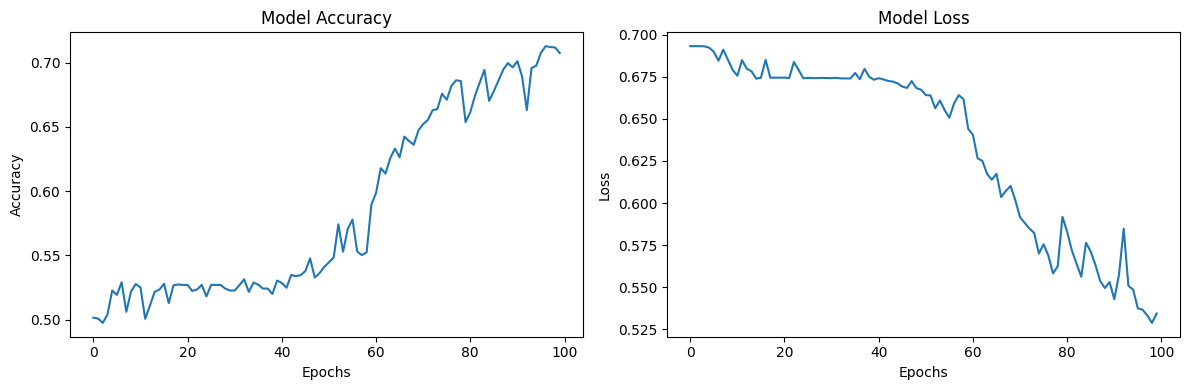

In [8]:
from model import accuracy_loss_plot
accuracy_loss_plot(history)

In [9]:
# from model import accuracy_loss_plot

# combined_history = {}
# for key in history.history.keys():
#     combined_history[key] = history.history[key] + history_after_whole_file.history[key] + history_after_whole_file_and_balanced.history[key]

    
# accuracy_loss_plot(combined_history, combined=True)

In [10]:
single_test_data = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_pre_ictal_data.npy")
single_test_labels = np.load("ml_processed_balanced_pre_ictal/chb01_03.edf_pre_ictal_labels.npy")
print(single_test_data.shape)

predictions = model.predict(single_test_data)

(80, 23, 256)
3/3 [==============================] - 0s 8ms/step


In [11]:
print(predictions)

[[[0.6465037 ]]

 [[0.6456895 ]]

 [[0.06547184]]

 [[0.3491137 ]]

 [[0.6430446 ]]

 [[0.6402924 ]]

 [[0.6451357 ]]

 [[0.6383034 ]]

 [[0.6412032 ]]

 [[0.21186808]]

 [[0.64805603]]

 [[0.6432037 ]]

 [[0.6503211 ]]

 [[0.6484728 ]]

 [[0.64615434]]

 [[0.4883176 ]]

 [[0.6431661 ]]

 [[0.32099107]]

 [[0.63748366]]

 [[0.63947994]]

 [[0.6395816 ]]

 [[0.6394385 ]]

 [[0.00726836]]

 [[0.6468782 ]]

 [[0.6427936 ]]

 [[0.09772484]]

 [[0.300489  ]]

 [[0.00103456]]

 [[0.6582574 ]]

 [[0.29043716]]

 [[0.64879936]]

 [[0.32655108]]

 [[0.6511963 ]]

 [[0.65657836]]

 [[0.12282866]]

 [[0.07134373]]

 [[0.3255326 ]]

 [[0.56985277]]

 [[0.64994466]]

 [[0.65192413]]

 [[0.18667953]]

 [[0.50351846]]

 [[0.6370973 ]]

 [[0.6420246 ]]

 [[0.532541  ]]

 [[0.6400734 ]]

 [[0.08635001]]

 [[0.64159536]]

 [[0.6405647 ]]

 [[0.64183795]]

 [[0.64414096]]

 [[0.44705254]]

 [[0.2801237 ]]

 [[0.6488696 ]]

 [[0.64929605]]

 [[0.63871205]]

 [[0.6454636 ]]

 [[0.6417612 ]]

 [[0.6396783 ]

In [18]:
file = "chb03_01"
whole_file_data = np.load("ml_processed_pre_ictal/" + file + ".edf_pre_ictal_data.npy")
whole_file_labels = np.load("ml_processed_pre_ictal/" + file + ".edf_pre_ictal_labels.npy")
# whole_file_labels = np.load("ml_processed/chb04_08.edf_labels.npy")
# whole_file_labels = np.load("ml_processed/chb04_08.edf_labels.npy")

print(whole_file_data.shape)
predictions = model.predict(whole_file_data)

false_pos = 0
true_pos = 0
false_neg = 0
true_neg = 0
for i, prediction in enumerate(predictions):
    p = prediction[0][0]
    # if p == 1:
    if p > 0.65:
        if whole_file_labels[i] == 0:
            false_pos += 1
        else:
            true_pos += 1
    else:
        if whole_file_labels[i] == 1:
            false_neg += 1
        else:
            true_neg += 1

print("\t false", "\t", "true")
print("pos \t", false_pos, "\t", true_pos)
print("neg \t", false_neg, "\t", true_neg)

print("\nCorrect% =", ((true_pos + true_neg) / whole_file_data.shape[0]) * 100)

(3547, 23, 256)
111/111 [==============================] - 0s 4ms/step
	 false 	 true
pos 	 537 	 0
neg 	 39 	 2971

Correct% = 83.76092472511982


In [13]:
# from data import generate_pre_ictal_train_data
# generate_pre_ictal_train_data(256, 256 ,test_cases,40)